In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('./job-market.csv')
df.head()

Id                                              Title  \
0  37404348.0                           Casual Stock Replenisher   
1  37404337.0                           Casual Stock Replenisher   
2  37404356.0  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3  37404330.0                              Team member - Belrose   
4  37404308.0  Business Banking Contact Centre Specialist, Ni...   

                                          Company                      Date  \
0                                     Aldi Stores  2018-10-07T00:00:00.000Z   
1                                     Aldi Stores  2018-10-07T00:00:00.000Z   
2                             LB Creative Pty Ltd  2018-10-07T00:00:00.000Z   
3                          Anaconda Group Pty Ltd  2018-10-07T00:00:00.000Z   
4  Commonwealth Bank - Business & Private Banking  2018-10-07T00:00:00.000Z   

                  Location                         Area  \
0                   Sydney  North West & Hills District   
1    Richmond & Hawkesbury                          NaN   
2                 Brisbane          CBD & Inner Suburbs   
3  Gosford & Central Coast                          NaN   
4                   Sydney        Ryde & Macquarie Park   

                   Classification  SubClassification  \
0      Retail & Consumer Products  Retail Assistants   
1      Retail & Consumer Products  Retail Assistants   
2      Retail & Consumer Products  Retail Assistants   
3      Retail & Consumer Products  Retail Assistants   
4  Call Centre & Customer Service    Sales - Inbound   

                                         Requirement FullDescription  \
0  Our Casual Stock Replenishers pride themselves...             NaN   
1  Our Casual Stock Replenishers pride themselves...             NaN   
2  BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA             NaN   
3  Bring it on - do you love the great outdoors a...             NaN   
4  We are seeking highly articulate, enthusiastic...             NaN   

   LowestSalary  HighestSalary JobType  
0           0.0           30.0     NaN  
1           0.0           30.0     NaN  
2           0.0           30.0     NaN  
3           0.0           30.0     NaN  
4           0.0           30.0     NaN

In [3]:
df.dtypes

Id                   float64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary         float64
HighestSalary        float64
JobType               object
dtype: object

In [4]:
df['Location']

0                         Sydney
1          Richmond & Hawkesbury
2                       Brisbane
3        Gosford & Central Coast
4                         Sydney
                  ...           
40784                        NaN
40785                        NaN
40786                        NaN
40787                        NaN
40788                        NaN
Name: Location, Length: 40789, dtype: object

In [5]:
df.isnull().sum()

Id                   30690
Title                30690
Company              31306
Date                 30690
Location             30690
Area                 34397
Classification       30690
SubClassification    30690
Requirement          30690
FullDescription      30946
LowestSalary         30690
HighestSalary        30690
JobType              30937
dtype: int64

In [6]:
df[df.duplicated()].shape[0]

30689

In [7]:
df.drop_duplicates(inplace= True)

In [8]:
df[df.duplicated()].shape[0]

0

In [9]:
df.isnull().sum()

Id                      1
Title                   1
Company               617
Date                    1
Location                1
Area                 3708
Classification          1
SubClassification       1
Requirement             1
FullDescription       257
LowestSalary            1
HighestSalary           1
JobType               248
dtype: int64

In [10]:
df.dropna(how='all', inplace=True)

In [11]:
df.isnull().sum()

Id                      0
Title                   0
Company               616
Date                    0
Location                0
Area                 3707
Classification          0
SubClassification       0
Requirement             0
FullDescription       256
LowestSalary            0
HighestSalary           0
JobType               247
dtype: int64

In [12]:
df['Location']

0                         Sydney
1          Richmond & Hawkesbury
2                       Brisbane
3        Gosford & Central Coast
4                         Sydney
                  ...           
10094                  Melbourne
10095                  Melbourne
10096                   Brisbane
10097                   Brisbane
10098                     Sydney
Name: Location, Length: 10099, dtype: object

In [13]:
df['NumberOfJob'] = 1

In [14]:
df

Id                                              Title  \
0      37404348.0                           Casual Stock Replenisher   
1      37404337.0                           Casual Stock Replenisher   
2      37404356.0  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3      37404330.0                              Team member - Belrose   
4      37404308.0  Business Banking Contact Centre Specialist, Ni...   
...           ...                                                ...   
10094  37388912.0                                Executive Assistant   
10095  37388903.0                   Payroll Officer - Neller Preceda   
10096  37388901.0                       Receptionist / Administrator   
10097  37388898.0          INTERNATIONAL WHOLESALE TRAVEL CONSULTANT   
10098  37388893.0                    Customer Service Representative   

                                              Company  \
0                                         Aldi Stores   
1                                         Aldi Stores   
2                                 LB Creative Pty Ltd   
3                              Anaconda Group Pty Ltd   
4      Commonwealth Bank - Business & Private Banking   
...                                               ...   
10094                              V/Line Corporation   
10095                      Hays Accountancy & Finance   
10096                     Randstad - Business Support   
10097                        AA Appointments Brisbane   
10098                                    Kennedy Reid   

                           Date                 Location  \
0      2018-10-07T00:00:00.000Z                   Sydney   
1      2018-10-07T00:00:00.000Z    Richmond & Hawkesbury   
2      2018-10-07T00:00:00.000Z                 Brisbane   
3      2018-10-07T00:00:00.000Z  Gosford & Central Coast   
4      2018-10-07T00:00:00.000Z                   Sydney   
...                         ...                      ...   
10094  2018-10-04T00:00:00.000Z                Melbourne   
10095  2018-10-04T00:00:00.000Z                Melbourne   
10096  2018-10-04T00:00:00.000Z                 Brisbane   
10097  2018-10-04T00:00:00.000Z                 Brisbane   
10098  2018-10-04T00:00:00.000Z                   Sydney   

                              Area                   Classification  \
0      North West & Hills District       Retail & Consumer Products   
1                              NaN       Retail & Consumer Products   
2              CBD & Inner Suburbs       Retail & Consumer Products   
3                              NaN       Retail & Consumer Products   
4            Ryde & Macquarie Park   Call Centre & Customer Service   
...                            ...                              ...   
10094          CBD & Inner Suburbs  Administration & Office Support   
10095          CBD & Inner Suburbs                       Accounting   
10096          CBD & Inner Suburbs  Administration & Office Support   
10097          CBD & Inner Suburbs            Hospitality & Tourism   
10098     South West & M5 Corridor   Call Centre & Customer Service   

               SubClassification  \
0              Retail Assistants   
1              Retail Assistants   
2              Retail Assistants   
3              Retail Assistants   
4                Sales - Inbound   
...                          ...   
10094       PA, EA & Secretarial   
10095                    Payroll   
10096  Administrative Assistants   
10097  Travel Agents/Consultants   
10098                      Other   

                                             Requirement  \
0      Our Casual Stock Replenishers pride themselves...   
1      Our Casual Stock Replenishers pride themselves...   
2      BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA   
3      Bring it on - do you love the great outdoors a...   
4      We are seeking highly articulate, enthusiastic...   
...                                                  ...   
10094  The Executive Assistant will pr

In [15]:
locationTable = pd.pivot_table(data=df, index=['Location'], aggfunc={'NumberOfJob': np.sum}).sort_values(by='NumberOfJob',ascending=False).reset_index()

locationTable

Location  NumberOfJob
0                                 Sydney         2784
1                              Melbourne         2481
2                               Brisbane         1119
3                                  Perth          677
4                               Adelaide          390
..                                   ...          ...
60  Fleurieu Peninsula & Kangaroo Island            6
61                 Tumut, Snowy & Monaro            4
62                    Somerset & Lockyer            4
63              Central & South East TAS            3
64              Coober Pedy & Outback SA            1

[65 rows x 2 columns]

<AxesSubplot:xlabel='NumberOfJob', ylabel='Location'>

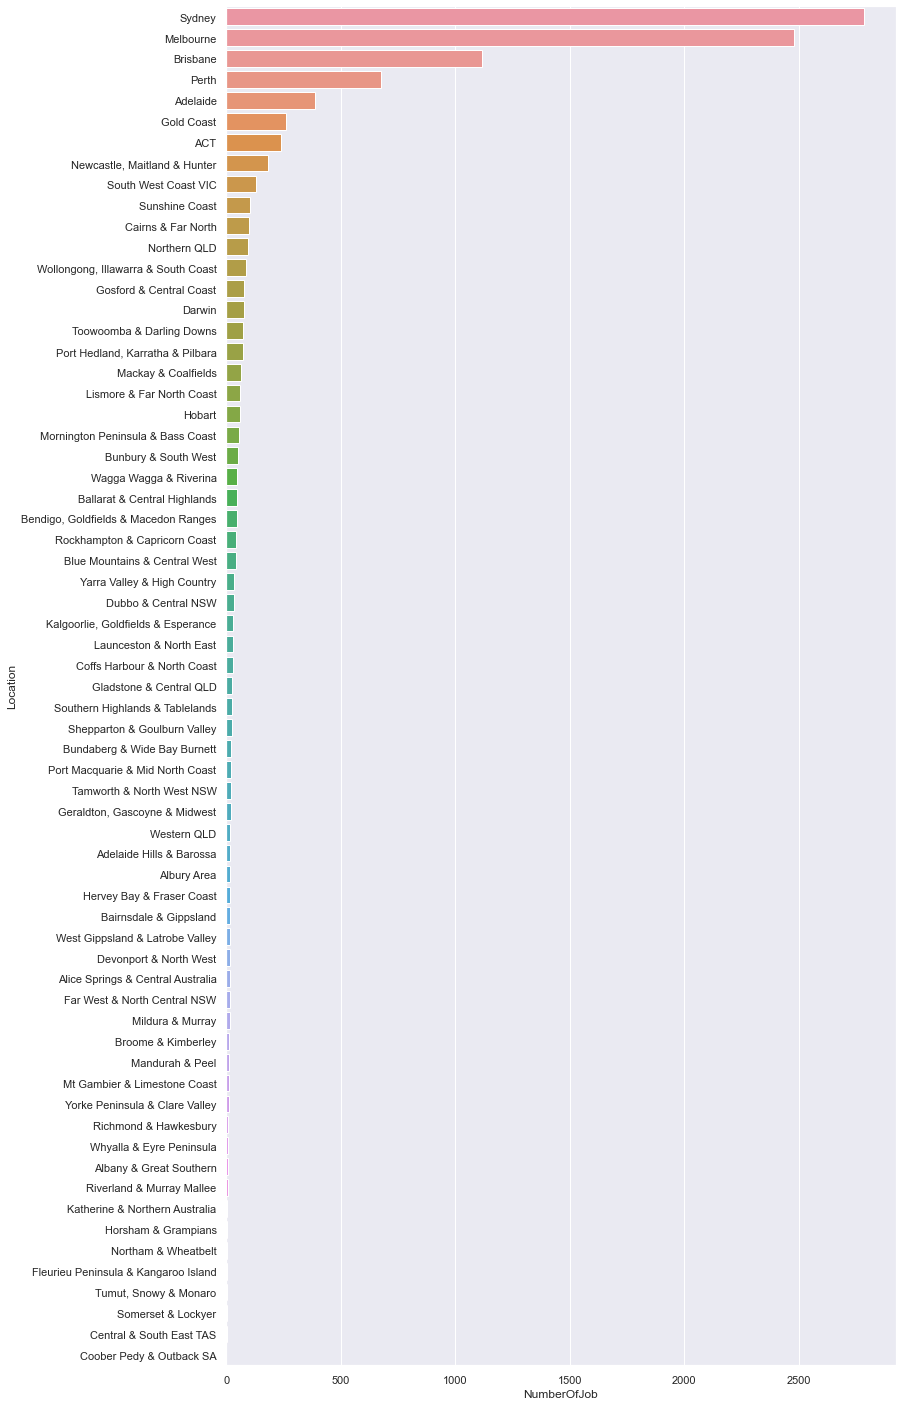

In [16]:
sns.set(rc={'figure.figsize':(12,25)})

sns.barplot(x="NumberOfJob", y="Location",data=locationTable)

In [17]:
df['LowestSalaryStr']= df['LowestSalary'].astype(str)
df['HighestSalaryStr']= df['HighestSalary'].astype(str)
df

Id                                              Title  \
0      37404348.0                           Casual Stock Replenisher   
1      37404337.0                           Casual Stock Replenisher   
2      37404356.0  RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...   
3      37404330.0                              Team member - Belrose   
4      37404308.0  Business Banking Contact Centre Specialist, Ni...   
...           ...                                                ...   
10094  37388912.0                                Executive Assistant   
10095  37388903.0                   Payroll Officer - Neller Preceda   
10096  37388901.0                       Receptionist / Administrator   
10097  37388898.0          INTERNATIONAL WHOLESALE TRAVEL CONSULTANT   
10098  37388893.0                    Customer Service Representative   

                                              Company  \
0                                         Aldi Stores   
1                                         Aldi Stores   
2                                 LB Creative Pty Ltd   
3                              Anaconda Group Pty Ltd   
4      Commonwealth Bank - Business & Private Banking   
...                                               ...   
10094                              V/Line Corporation   
10095                      Hays Accountancy & Finance   
10096                     Randstad - Business Support   
10097                        AA Appointments Brisbane   
10098                                    Kennedy Reid   

                           Date                 Location  \
0      2018-10-07T00:00:00.000Z                   Sydney   
1      2018-10-07T00:00:00.000Z    Richmond & Hawkesbury   
2      2018-10-07T00:00:00.000Z                 Brisbane   
3      2018-10-07T00:00:00.000Z  Gosford & Central Coast   
4      2018-10-07T00:00:00.000Z                   Sydney   
...                         ...                      ...   
10094  2018-10-04T00:00:00.000Z                Melbourne   
10095  2018-10-04T00:00:00.000Z                Melbourne   
10096  2018-10-04T00:00:00.000Z                 Brisbane   
10097  2018-10-04T00:00:00.000Z                 Brisbane   
10098  2018-10-04T00:00:00.000Z                   Sydney   

                              Area                   Classification  \
0      North West & Hills District       Retail & Consumer Products   
1                              NaN       Retail & Consumer Products   
2              CBD & Inner Suburbs       Retail & Consumer Products   
3                              NaN       Retail & Consumer Products   
4            Ryde & Macquarie Park   Call Centre & Customer Service   
...                            ...                              ...   
10094          CBD & Inner Suburbs  Administration & Office Support   
10095          CBD & Inner Suburbs                       Accounting   
10096          CBD & Inner Suburbs  Administration & Office Support   
10097          CBD & Inner Suburbs            Hospitality & Tourism   
10098     South West & M5 Corridor   Call Centre & Customer Service   

               SubClassification  \
0              Retail Assistants   
1              Retail Assistants   
2              Retail Assistants   
3              Retail Assistants   
4                Sales - Inbound   
...                          ...   
10094       PA, EA & Secretarial   
10095                    Payroll   
10096  Administrative Assistants   
10097  Travel Agents/Consultants   
10098                      Other   

                                             Requirement  \
0      Our Casual Stock Replenishers pride themselves...   
1      Our Casual Stock Replenishers pride themselves...   
2      BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA   
3      Bring it on - do you love the great outdoors a...   
4      We are seeking highly articulate, enthusiastic...   
...                                                  ...   
10094  The Executive Assistant will pr

In [18]:
df['SalaryRange'] = df['LowestSalaryStr'] + '-' + df['HighestSalaryStr']
df['SalaryRange']

0         0.0-30.0
1         0.0-30.0
2         0.0-30.0
3         0.0-30.0
4         0.0-30.0
           ...    
10094    50.0-60.0
10095    50.0-60.0
10096    50.0-60.0
10097    50.0-60.0
10098    50.0-60.0
Name: SalaryRange, Length: 10099, dtype: object

In [19]:
totalJob = df['NumberOfJob'].sum()
df['Rate'] = df['NumberOfJob']
salaryTable = pd.pivot_table(data=df, index=['SalaryRange'], aggfunc={'Rate': np.sum}).reset_index()

salaryTable.Rate = round(salaryTable.Rate/totalJob * 100, 1)
salaryTable

SalaryRange  Rate
0    0.0-30.0  38.6
1   30.0-40.0  18.2
2   40.0-50.0  24.9
3   50.0-60.0  18.3

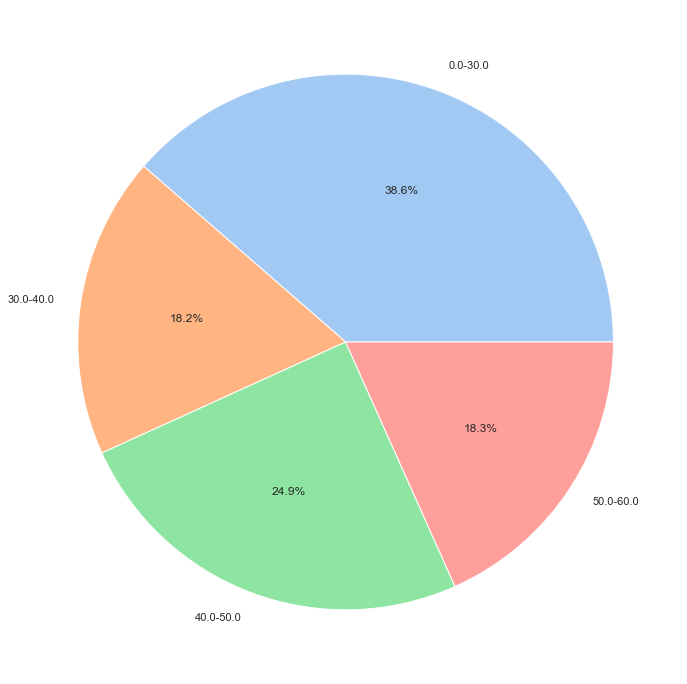

In [20]:
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(salaryTable['Rate'], labels = salaryTable['SalaryRange'], colors = colors, autopct='%.1f%%')
plt.show()

In [21]:
classificationTable = pd.pivot_table(data=df, index=['Classification'], aggfunc={'NumberOfJob': np.sum}).sort_values(by='NumberOfJob',ascending=False).reset_index()
classificationTable

Classification  NumberOfJob
0                    Hospitality & Tourism         1585
1                        Trades & Services         1225
2     Manufacturing, Transport & Logistics          990
3               Retail & Consumer Products          896
4          Administration & Office Support          746
5                     Healthcare & Medical          622
6   Information & Communication Technology          411
7                     Education & Training          401
8                                    Sales          389
9                               Accounting          378
10          Call Centre & Customer Service          342
11                            Construction          265
12        Community Services & Development          258
13                  Real Estate & Property          228
14                    Government & Defence          203
15              Mining, Resources & Energy          176
16            Banking & Financial Services          153
17              Marketing & Communications          139
18           Human Resources & Recruitment          138
19                             Engineering          126
20                                   Legal           94
21                   Design & Architecture           69
22                      Sport & Recreation           61
23         Farming, Animals & Conservation           56
24              Insurance & Superannuation           45
25               Advertising, Arts & Media           45
26                    Science & Technology           22
27                CEO & General Management           17
28                   Consulting & Strategy           14
29                         Self Employment            5

<AxesSubplot:xlabel='NumberOfJob', ylabel='Classification'>

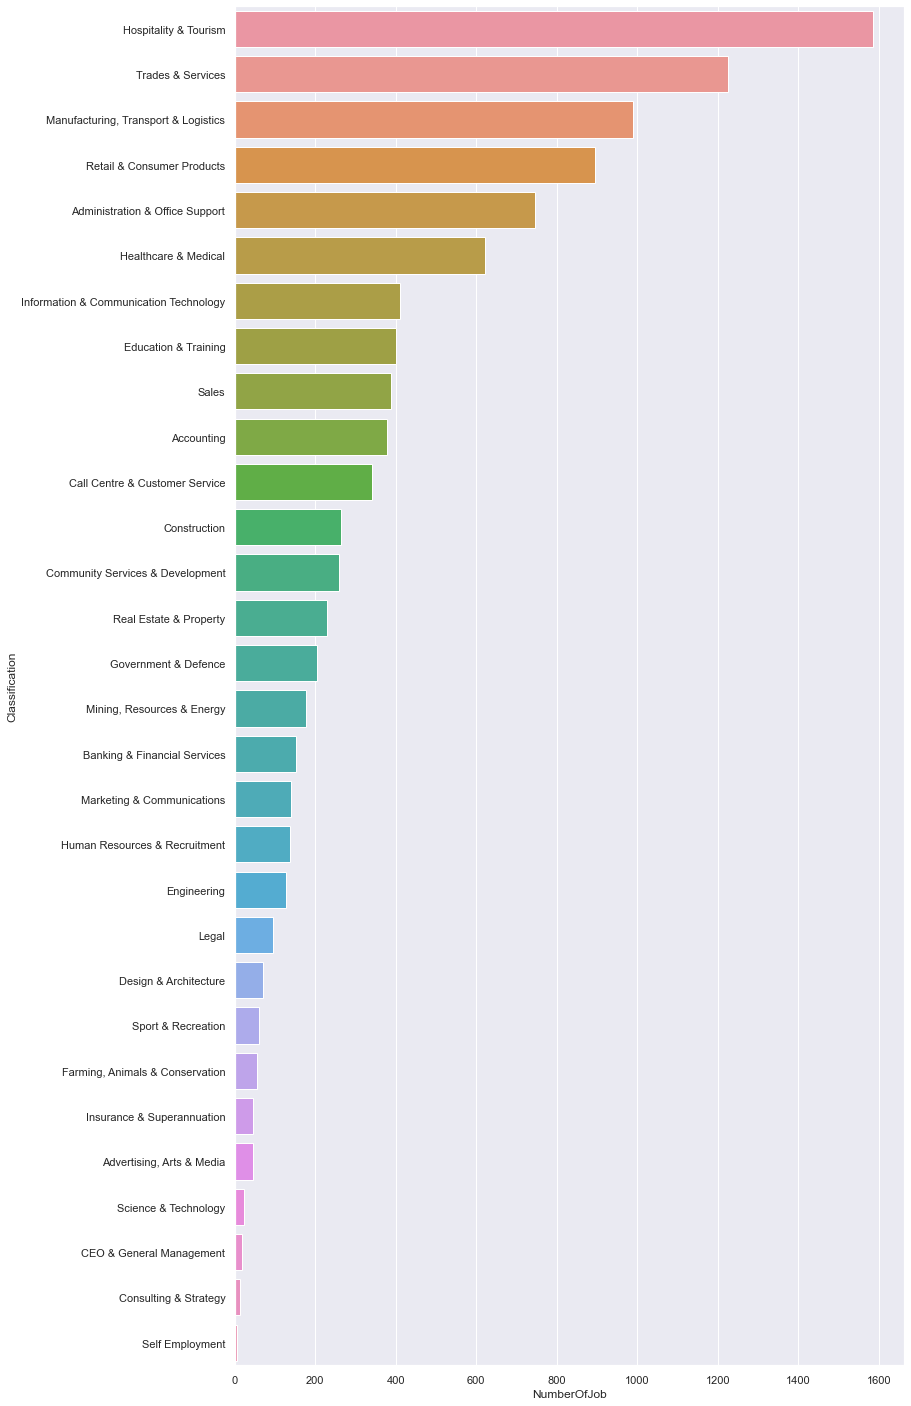

In [22]:
sns.set(rc={'figure.figsize':(12,25)})

sns.barplot(x="NumberOfJob", y="Classification",data=classificationTable)

In [23]:
companyTable = pd.pivot_table(data=df, index=['Area'], aggfunc={'NumberOfJob': np.sum}).sort_values(by='NumberOfJob',ascending=False).reset_index()
companyTable

Area  NumberOfJob
0                   CBD & Inner Suburbs         1456
1     CBD, Inner West & Eastern Suburbs         1141
2       Bayside & South Eastern Suburbs          485
3          Parramatta & Western Suburbs          462
4                       Eastern Suburbs          429
5                      Northern Suburbs          422
6        North Shore & Northern Beaches          347
7                       Western Suburbs          292
8          CBD, Inner & Western Suburbs          250
9              South West & M5 Corridor          227
10  Southern Suburbs & Sutherland Shire          153
11             Southern Suburbs & Logan          142
12          North West & Hills District          126
13         Fremantle & Southern Suburbs          109
14         Northern Suburbs & Joondalup          105
15                Ryde & Macquarie Park           96
16            Western Suburbs & Ipswich           82
17            Bayside & Eastern Suburbs           47
18                 Rockingham & Kwinana           21

<AxesSubplot:xlabel='NumberOfJob', ylabel='Area'>

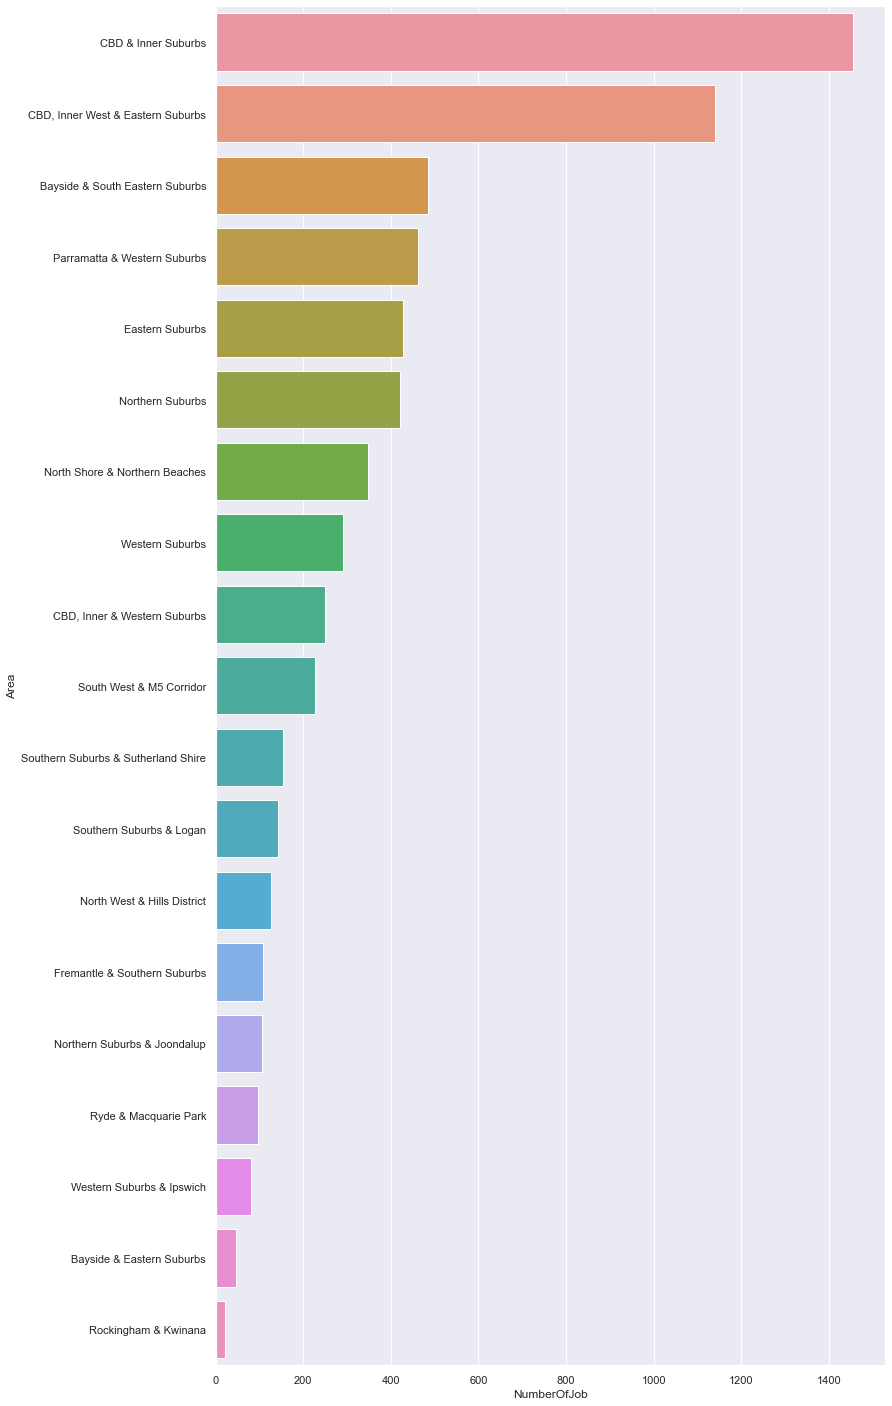

In [24]:
sns.set(rc={'figure.figsize':(12,25)})

sns.barplot(x="NumberOfJob", y="Area",data=companyTable)

In [25]:
dfWine = pd.read_csv('./wine.data.csv')
dfWine.head()

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

In [26]:
label = dfWine['Label']
label

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Label, Length: 178, dtype: int64

In [27]:
dfWine.drop(['Label'], axis=1, inplace=True)
dfWine

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

In [28]:
dfWine.isnull().sum()

Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

array([[<AxesSubplot:xlabel='Alcohol', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Malic acid', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Ash', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Alcalinity of ash', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Magnesium', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Total phenols', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Flavanoids', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Nonflavanoid phenols', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Proanthocyanins', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Color intensity', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Hue', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='OD280', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Proline', ylabel='Alcohol'>],
       [<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>,
        <AxesSubplot:xlabel='Malic acid', ylabel='Malic acid'>,
        <AxesSubplot:xlabel='Ash', ylabel='Malic acid'>,
        <AxesSubplot

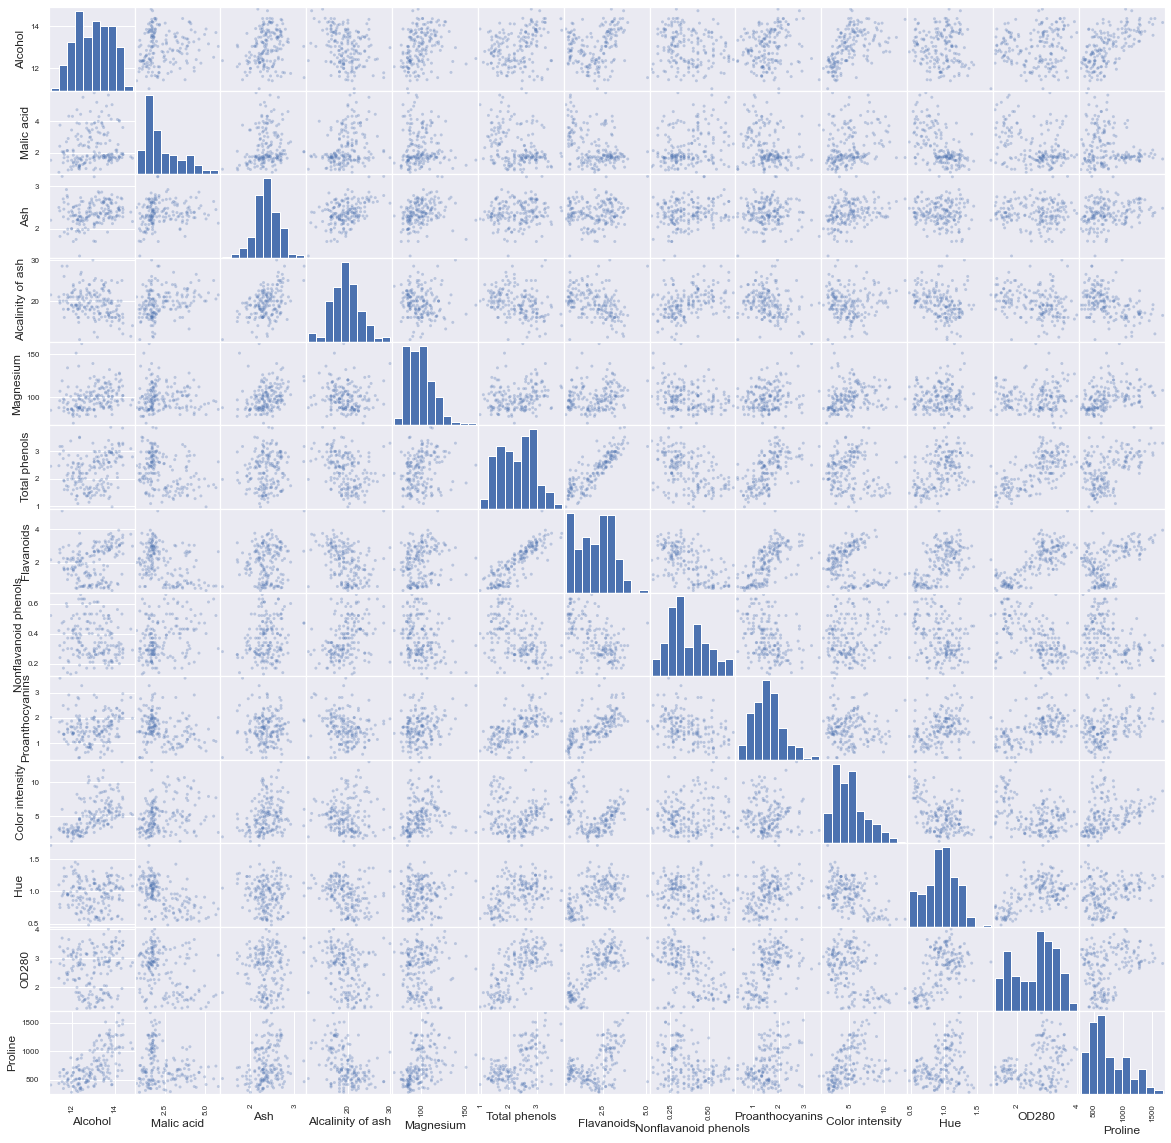

In [29]:

scatter_matrix(dfWine,figsize=(20,20),alpha=0.3)


<AxesSubplot:>

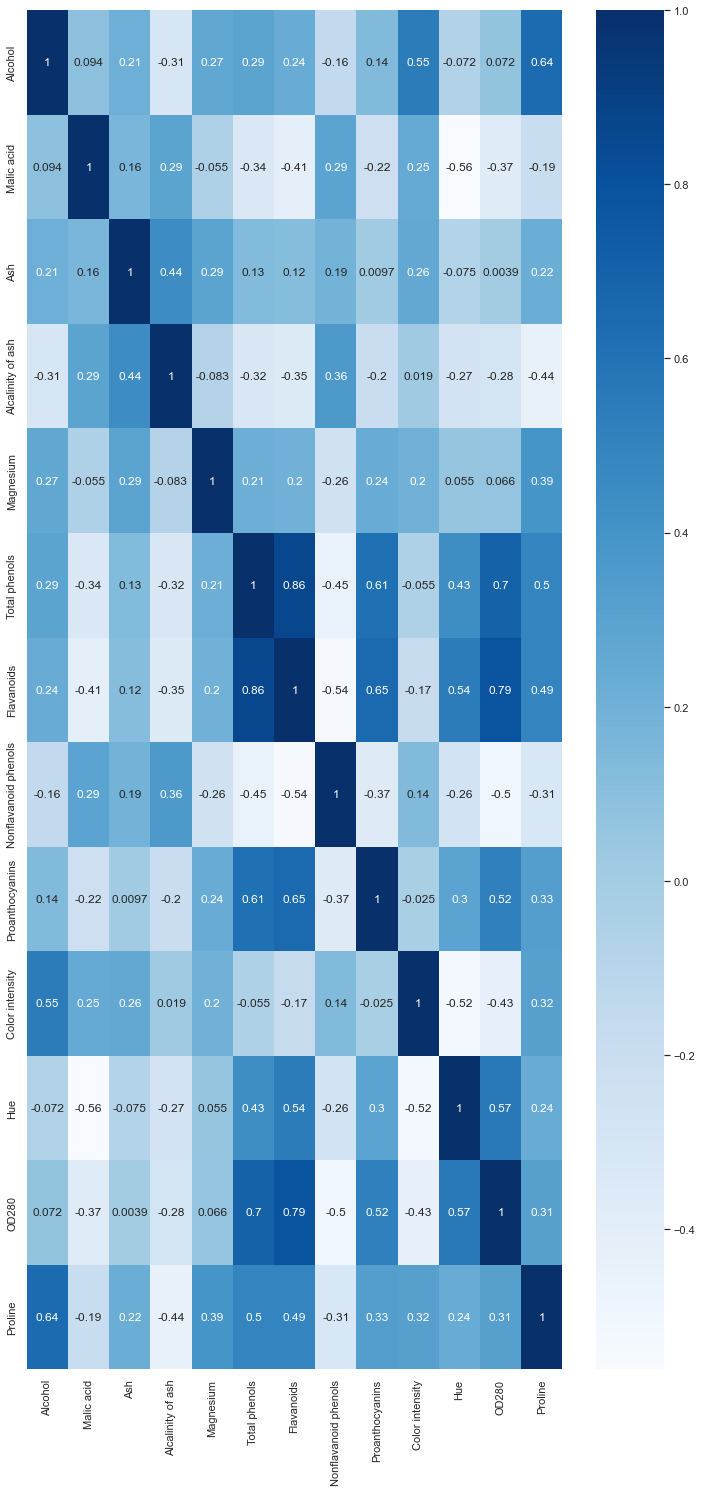

In [30]:
corr = dfWine.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

In [31]:
## List threepairs of attributes which have the largestcorrelation? 
# 1. Flavanoids - Total phenols
# 2. Flavanoids - OD280
# 3. Total phenols - OD280

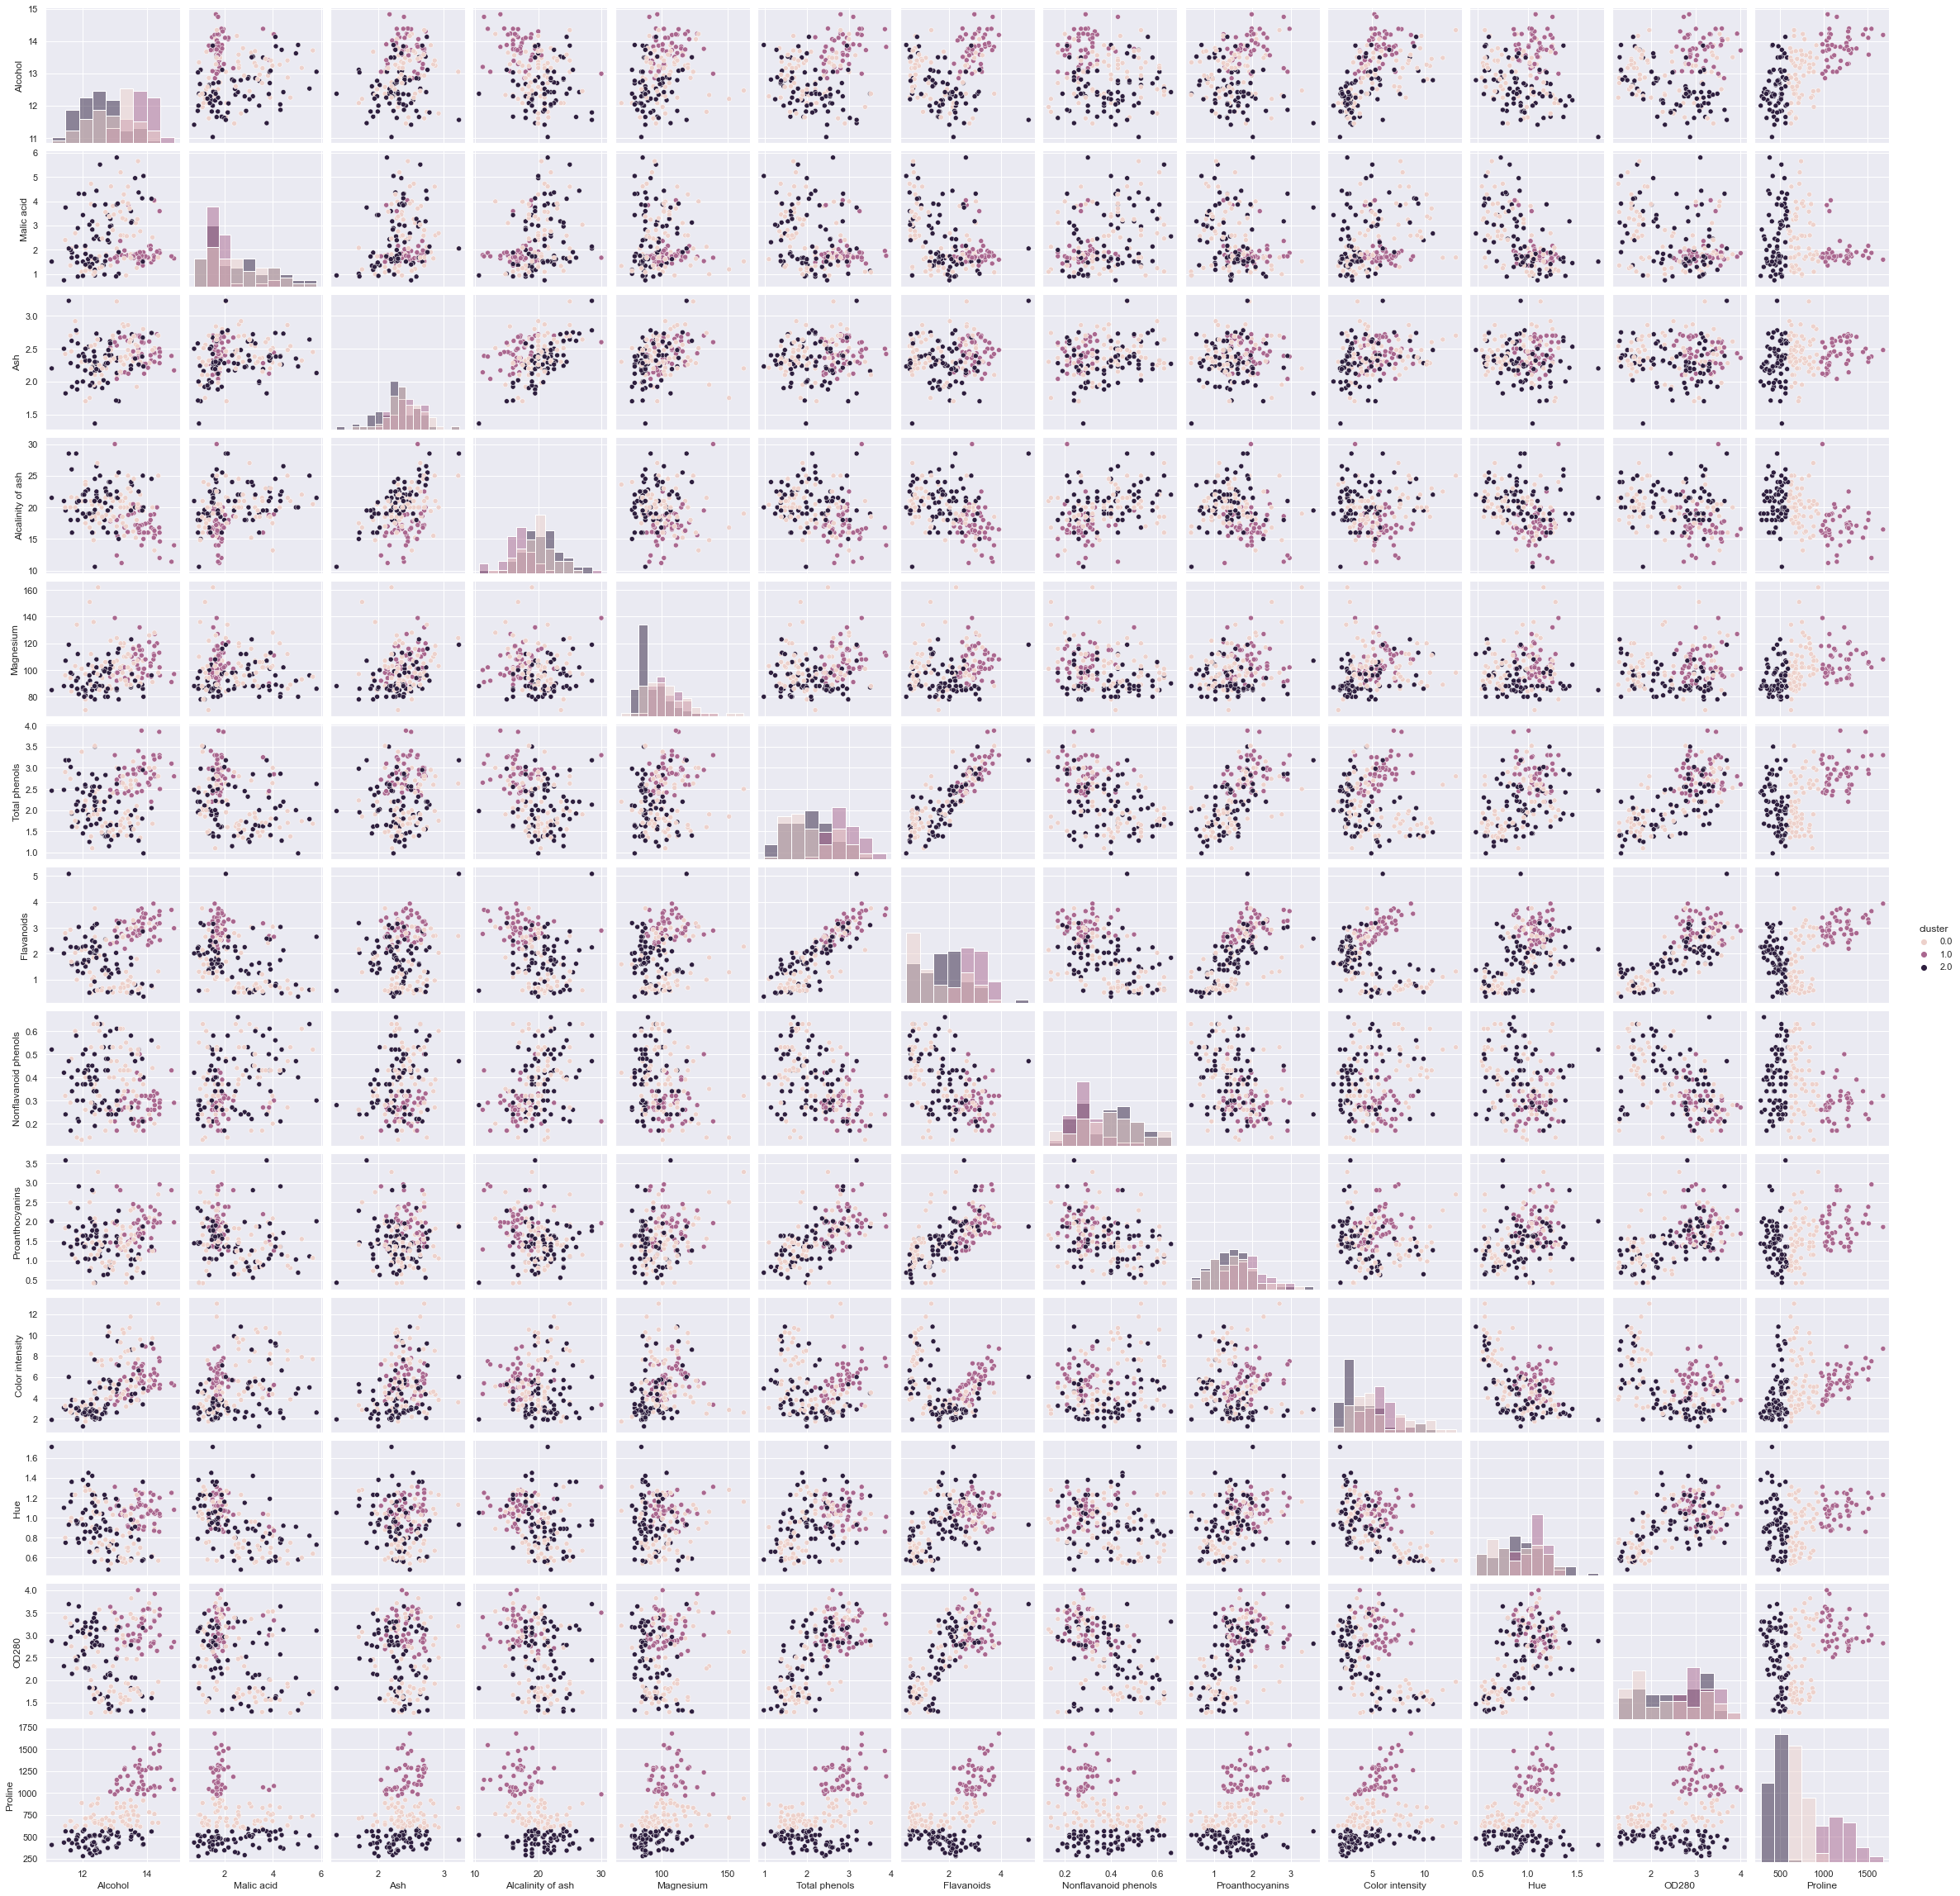

In [32]:
kMeansClustering = KMeans(n_clusters = 3, random_state=0)
res = kMeansClustering.fit_predict(dfWine)

labels= kMeansClustering.labels_

dfWine["cluster"] = labels.astype('float64')

sns_plot = sns.pairplot(dfWine, hue = "cluster",diag_kind="hist")